# Importing Libraries

In [2]:
# Imports Libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import linear_model

In [3]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initialising Data

In [27]:
# Initialises data
xData = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape(-1, 1)
yData = np.array([98, 173, 279, 422, 588, 716, 854, 907, 1139, 1364, 1637, 2074, 2767, 3397])

# Data that you are predicting for
xPrediction = np.array([2025, 2028]).reshape(-1, 1)

# Codes the data to be in a more manageable range
minXData = np.min(xData)
xData -= minXData
xPrediction -= minXData

# Model

In [45]:
# Look at https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

# Creates a range of models with different parameters
models = [linear_model.Ridge(alpha) for alpha in range(0, 20, 5)]

In [46]:
yPredictions = []

# Trains each model
for model in models:
  model.fit(xData, yData)

  # Uses the model to perform a prediction
  yPredictions.append(model.predict(xPrediction))

# Plotting the Results

In [30]:
# Initialises constants
X_LABEL = "x-axis label"
Y_LABEL = "y-axis label"
LINE_LABEL = "Line Label"
LOWER_X, UPPER_X = 0, 30

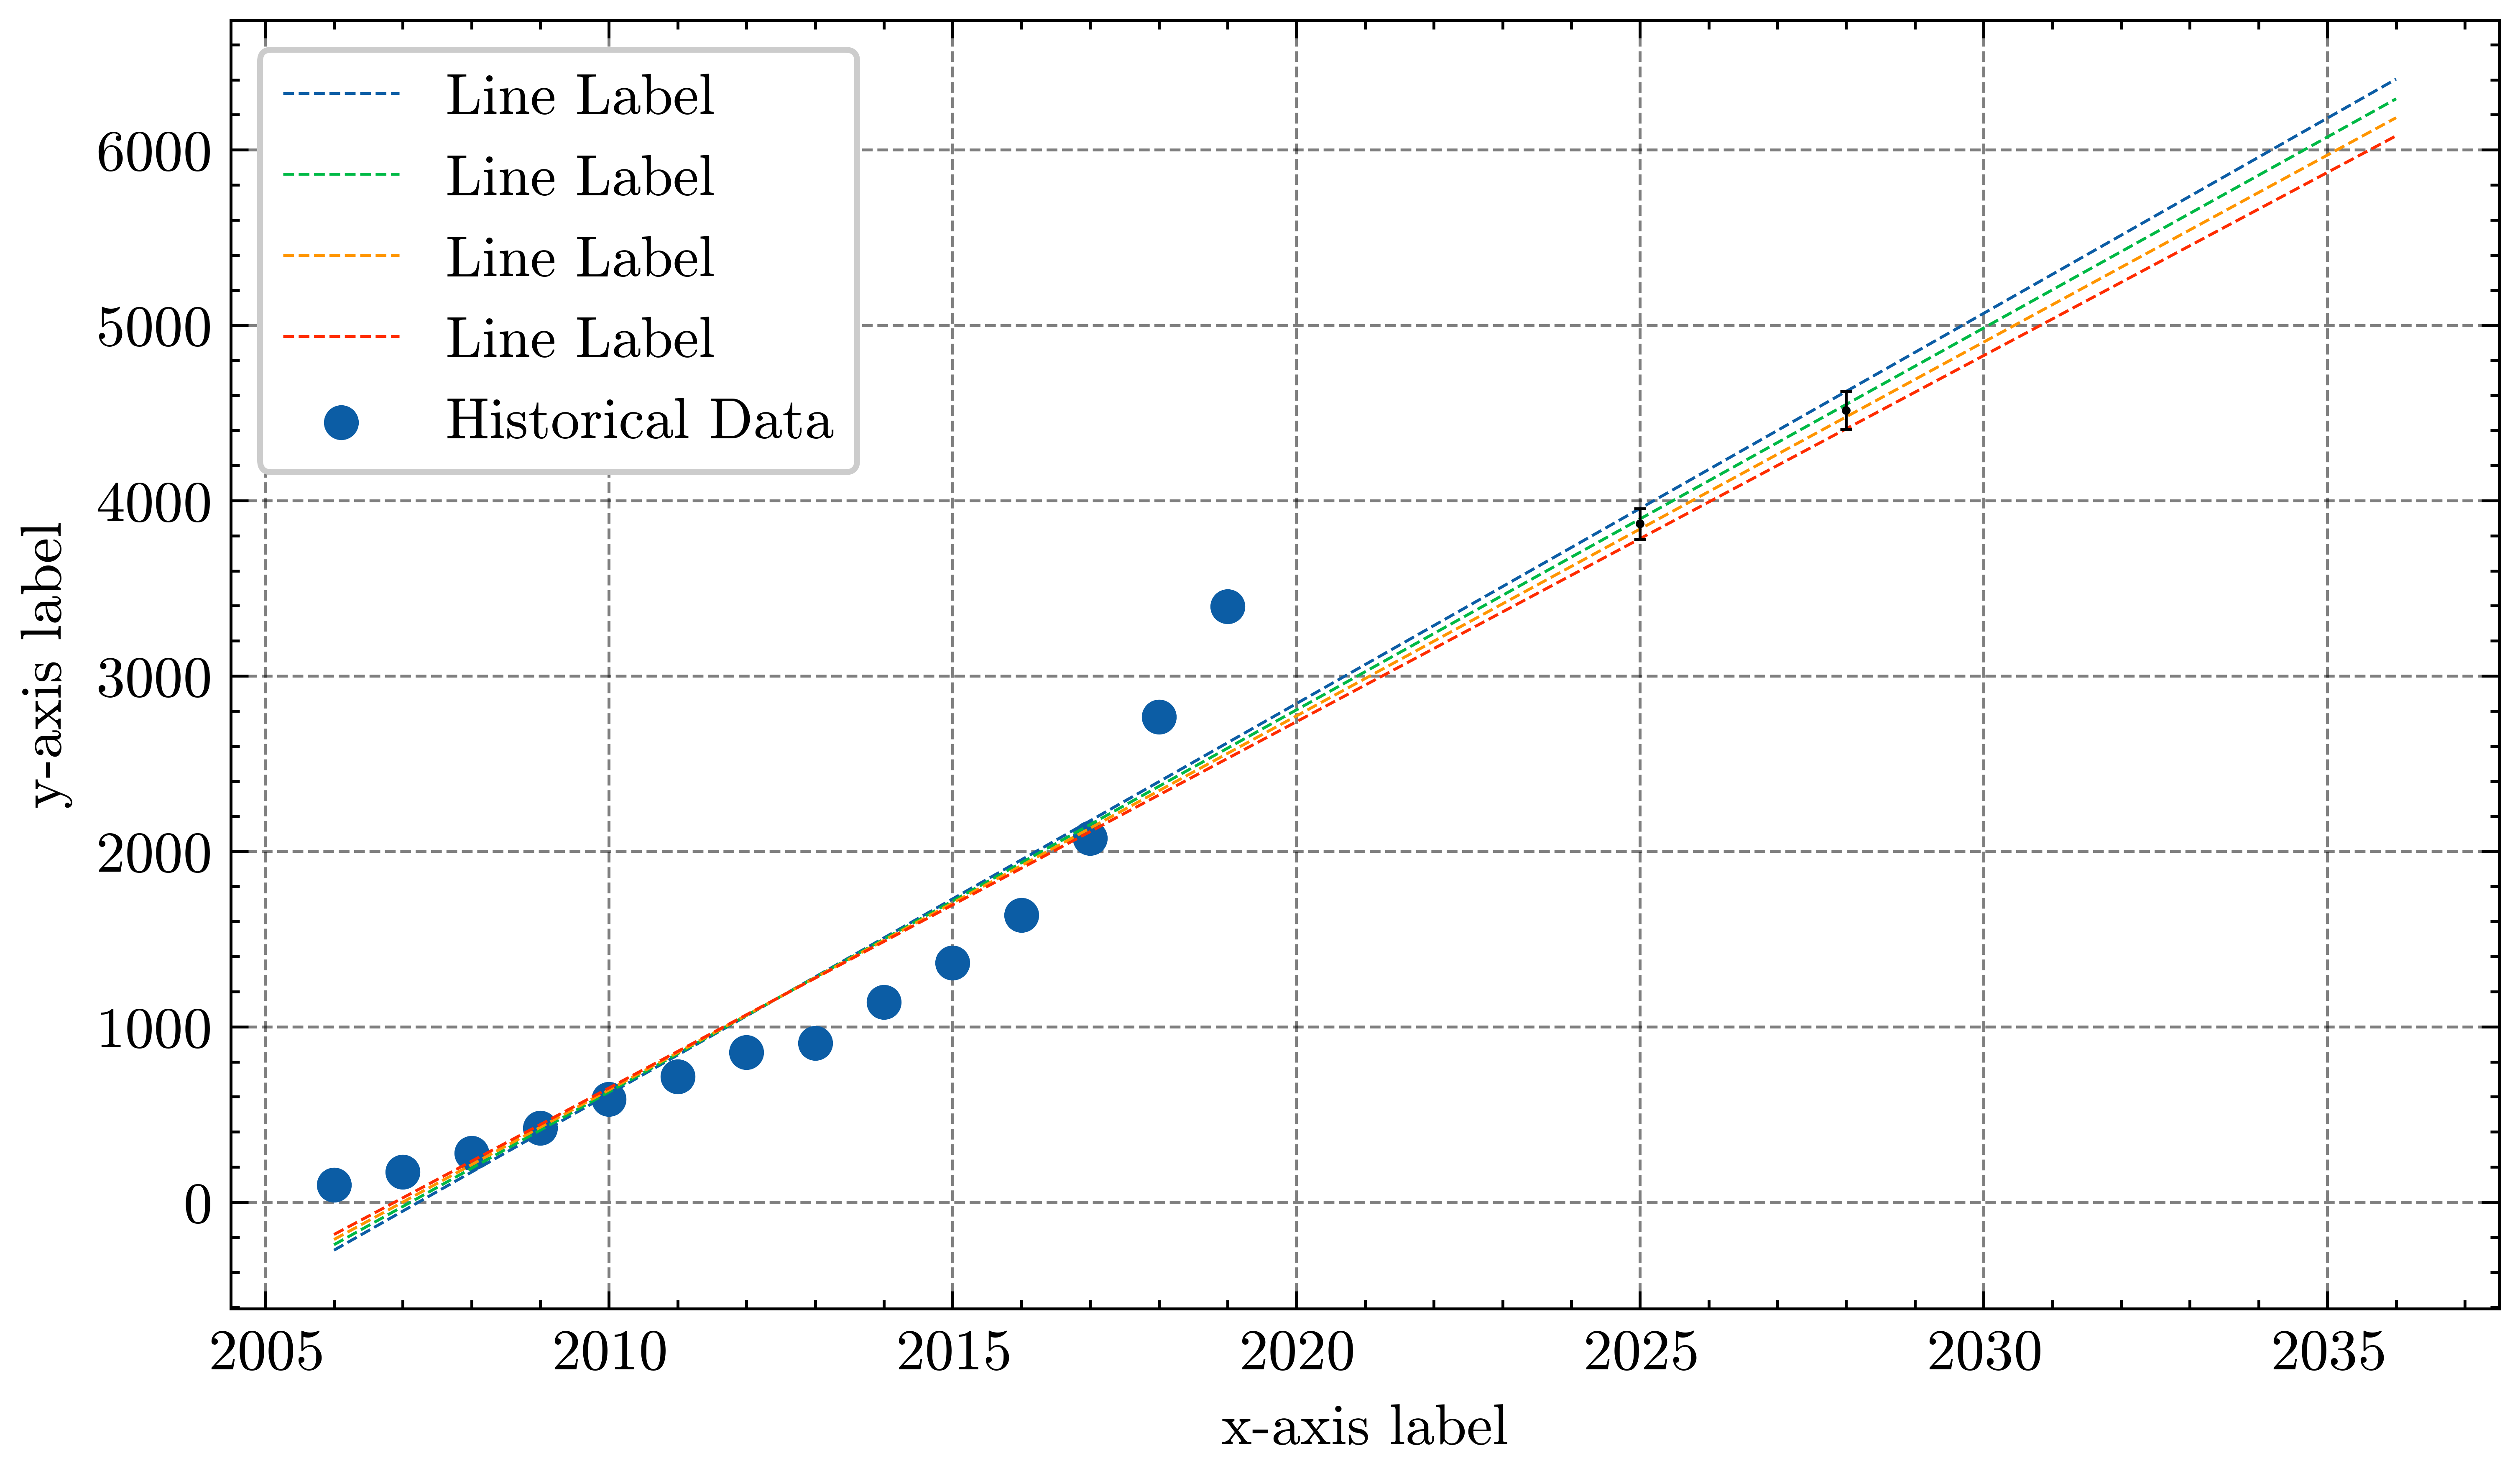

In [47]:
# Initialises settings of the graph
plt.figure(figsize=(7,4), dpi=1000)

plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

# Plots the regression
xPlot = np.linspace(LOWER_X, UPPER_X, 100).reshape(-1, 1)

# Plots the regression lines for the different models
for model in models:
  plt.plot(xPlot + minXData, model.predict(xPlot), linestyle='dashed', linewidth=0.5, label=LINE_LABEL)

# Plots the error bars for the predictions
plt.errorbar(xPrediction + minXData, np.mean(yPredictions, axis=0),
             yerr = np.abs(np.mean(yPredictions, axis=0) - np.max(yPredictions, axis=0)),
             fmt='.', ms=2, capsize=1, linewidth=0.5, color='black', markeredgewidth=0.5)

# Plots the data and prediction points
plt.scatter(xData + minXData, yData, marker="o", s=25, label="Historical Data")

plt.legend()
plt.show()